In [1]:
import batsim
import galsim
import numpy as np
import fpfs
import matplotlib.pyplot as plt

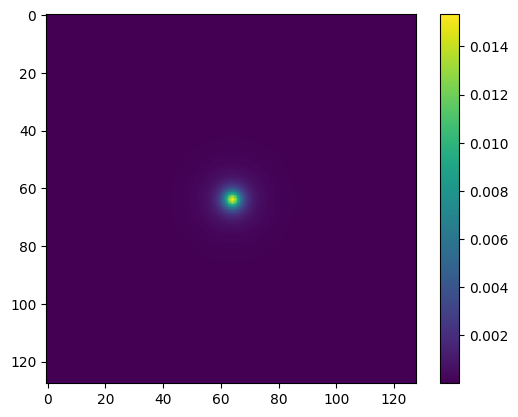

In [8]:
scale = 0.2
nn = 128

galaxy = galsim.Sersic(n=3, half_light_radius=1.0, flux=1.0)

seeing = 0.6
psf = galsim.Moffat(beta=3.5, fwhm=seeing, trunc=4*seeing)

galsim_conv = galsim.Convolve([galaxy, psf])

galsim_image = galsim_conv.shift(0.5*scale, 0.5*scale).drawImage(nx=nn, ny=nn, scale=scale, method='no_pixel').array

plt.imshow(galsim_image)
plt.colorbar()

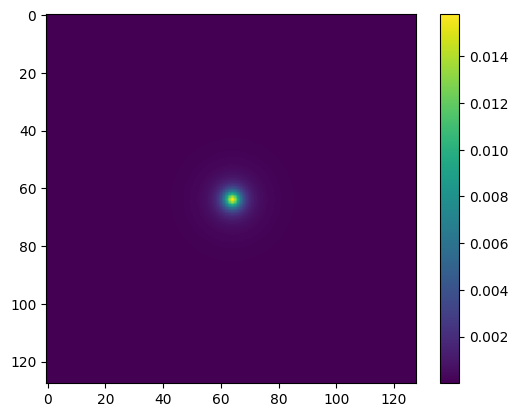

In [9]:
pixel = galsim.Pixel(scale)

psf_pixel = galsim.Convolve([psf, pixel])

batsim_image = batsim.simulate_galaxy(
        ngrid=nn,
        pix_scale=scale,
        gal_obj=galaxy,
        transform_obj=None,
        psf_obj=psf,
        draw_method='no_pixel'
    )

plt.imshow(batsim_image)
plt.colorbar()

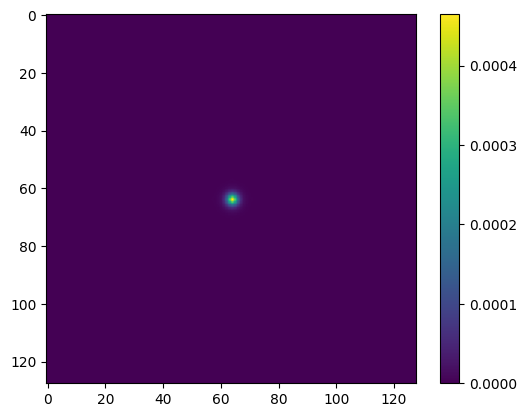

In [10]:
plt.imshow(batsim_image - galsim_image)
plt.colorbar()

In [17]:
def test_draw_methods():

    # set up galaxy object
    galaxy = galsim.Sersic(n=3, half_light_radius=1.0, flux=1.0).shear(e1=0.1, e2=0.03)

    # drawing parameters
    scale = 0.2
    nn=64

    # set up psf object
    seeing = 0.6
    psf = galsim.Moffat(beta=3.5, fwhm=seeing, trunc=4*seeing)

    # Create galsim image with no pixel convolution
    galsim_conv = galsim.Convolve([galaxy, psf])
    galsim_image_np = galsim_conv.shift(0.5*scale, 0.5*scale).drawImage(nx=nn, ny=nn, scale=scale, method='no_pixel').array

    # Create galsim image with pixel convolution
    galsim_image_auto = galsim_conv.shift(0.5*scale, 0.5*scale).drawImage(nx=nn, ny=nn, scale=scale, method='auto').array

    # Create batsim image with no pixel convolution
    batsim_image_np = batsim.simulate_galaxy(
        ngrid=nn,
        pix_scale=scale,
        gal_obj=galaxy,
        transform_obj=None,
        psf_obj=psf,
        draw_method='no_pixel'
    )

    # Create batsim image with pixel convolution
    batsim_image_auto = batsim.simulate_galaxy(
        ngrid=nn,
        pix_scale=scale,
        gal_obj=galaxy,
        transform_obj=None,
        psf_obj=psf,
        draw_method='auto'
    )

    # Test equalities
    np.testing.assert_array_almost_equal(galsim_image_np, batsim_image_np, decimal=3)
    np.testing.assert_array_almost_equal(galsim_image_auto, batsim_image_auto, decimal=3)

    return

test_draw_methods()